In [1]:
import sys
sys.path.append('../pyorderedfuzzy')
sys.path.append('../pyimgamo')

In [2]:
from scipy.spatial.distance import cdist
import numpy as np
import imgamo
import problems
from problems import Kursawe, Problem, DTLZ3, DTLZ2
from players import ClonalSelection, SimulatedAnnealing, SimpleGeneticAlg, ScipyMinimize
from operators import hiper_mutate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [66]:
n = 5
x = np.linspace(0.0001,0.9999,n)
x1, x2, x3, x4, x5 = np.meshgrid(x, x, x, x, x)
ref_dirs = np.zeros((n**5,5))
for i in range(n):
    for j in range(n):
        for k in range(n):
            for l in range(n):
                for m in range(n):
                    ref_dirs[i*n**4+j*n**3+k*n**2+l*n+m, 0] = x1[i,j,k,l,m]
                    ref_dirs[i*n**4+j*n**3+k*n**2+l*n+m, 1] = x2[i,j,k,l,m]
                    ref_dirs[i*n**4+j*n**3+k*n**2+l*n+m, 2] = x3[i,j,k,l,m]
                    ref_dirs[i*n**4+j*n**3+k*n**2+l*n+m, 3] = x4[i,j,k,l,m]
                    ref_dirs[i*n**4+j*n**3+k*n**2+l*n+m, 4] = x5[i,j,k,l,m]
                    
ref_dirs.shape

(3125, 5)

In [67]:
from pymoo.optimize import minimize
from pymoo.algorithms.nsga2 import nsga2
from pymoo.algorithms.nsga3 import nsga3
from pymoo.algorithms.moead import moead
from pymoo.util import plotting
from pymop.factory import get_problem

# load a test or define your own problem
problem = get_problem("dtlz3", n_var=12, n_obj=5)

# get the optimal solution of the problem for the purpose of comparison
#ref_dirs = np.random.random(size=(1000,5))
pf = problem.pareto_front(ref_dirs)

# create the algorithm object
#method = nsga3(pop_size=200, elimate_duplicates=True, ref_dirs=np.random.random(size=(200,3)))
method = moead(ref_dirs=np.random.random(size=(200,5)))

# execute the optimization
res = minimize(problem,
               method,
               termination=('n_gen', 1000),
               pf=pf,
               disp=True)

# plot the results as a scatter plot
#plotting.plot_3d(pf, res.F, labels=["Pareto Front", "F"])

n_gen | n_eval  | igd      | gd      
1     | 200     | 352.10340 | 872.80374
2     | 400     | 98.38825 | 201.20288
3     | 600     | 59.48449 | 94.63473
4     | 800     | 56.59332 | 64.98700
5     | 1000    | 45.51185 | 56.80118
6     | 1200    | 43.47939 | 50.66660
7     | 1400    | 43.19146 | 49.47861
8     | 1600    | 43.24707 | 48.06454
9     | 1800    | 39.96649 | 47.48818
10    | 2000    | 39.96649 | 46.86690
11    | 2200    | 39.37495 | 45.81798
12    | 2400    | 39.18922 | 45.33317
13    | 2600    | 38.83588 | 44.81557
14    | 2800    | 38.81243 | 44.29212
15    | 3000    | 38.81243 | 43.87969
16    | 3200    | 38.77783 | 43.55300
17    | 3400    | 36.36445 | 42.70241
18    | 3600    | 36.36445 | 42.34967
19    | 3800    | 36.36445 | 42.00753
20    | 4000    | 36.32506 | 41.71589
21    | 4200    | 36.31920 | 41.25712
22    | 4400    | 36.31920 | 40.93628
23    | 4600    | 35.99412 | 40.79604
24    | 4800    | 35.99412 | 40.60037
25    | 5000    | 34.23333 | 40.39841
26    | 5

213   | 42600   | 0.24757  | 0.10948 
214   | 42800   | 0.24721  | 0.10964 
215   | 43000   | 0.24593  | 0.10936 
216   | 43200   | 0.24535  | 0.10845 
217   | 43400   | 0.24416  | 0.10849 
218   | 43600   | 0.24248  | 0.10738 
219   | 43800   | 0.24077  | 0.10779 
220   | 44000   | 0.23974  | 0.10737 
221   | 44200   | 0.23963  | 0.10726 
222   | 44400   | 0.23864  | 0.10694 
223   | 44600   | 0.23839  | 0.10562 
224   | 44800   | 0.23765  | 0.10517 
225   | 45000   | 0.23574  | 0.10517 
226   | 45200   | 0.23549  | 0.10457 
227   | 45400   | 0.23389  | 0.10445 
228   | 45600   | 0.23371  | 0.10434 
229   | 45800   | 0.23246  | 0.10433 
230   | 46000   | 0.23318  | 0.10409 
231   | 46200   | 0.23305  | 0.10377 
232   | 46400   | 0.23104  | 0.10306 
233   | 46600   | 0.23141  | 0.10273 
234   | 46800   | 0.23035  | 0.10228 
235   | 47000   | 0.22845  | 0.10228 
236   | 47200   | 0.22819  | 0.10228 
237   | 47400   | 0.22758  | 0.10197 
238   | 47600   | 0.22688  | 0.10202 
239   | 4780

429   | 85800   | 0.19851  | 0.08845 
430   | 86000   | 0.19850  | 0.08854 
431   | 86200   | 0.19843  | 0.08852 
432   | 86400   | 0.19864  | 0.08841 
433   | 86600   | 0.19854  | 0.08857 
434   | 86800   | 0.19841  | 0.08837 
435   | 87000   | 0.19816  | 0.08878 
436   | 87200   | 0.19809  | 0.08874 
437   | 87400   | 0.19804  | 0.08858 
438   | 87600   | 0.19802  | 0.08859 
439   | 87800   | 0.19801  | 0.08871 
440   | 88000   | 0.19796  | 0.08874 
441   | 88200   | 0.19811  | 0.08884 
442   | 88400   | 0.19811  | 0.08883 
443   | 88600   | 0.19795  | 0.08875 
444   | 88800   | 0.19786  | 0.08895 
445   | 89000   | 0.19780  | 0.08875 
446   | 89200   | 0.19768  | 0.08853 
447   | 89400   | 0.19769  | 0.08859 
448   | 89600   | 0.19766  | 0.08858 
449   | 89800   | 0.19760  | 0.08867 
450   | 90000   | 0.19762  | 0.08882 
451   | 90200   | 0.19757  | 0.08878 
452   | 90400   | 0.19750  | 0.08879 
453   | 90600   | 0.19738  | 0.08885 
454   | 90800   | 0.19735  | 0.08885 
455   | 9100

645   | 129000  | 0.19039  | 0.08523 
646   | 129200  | 0.19041  | 0.08524 
647   | 129400  | 0.19036  | 0.08520 
648   | 129600  | 0.19040  | 0.08521 
649   | 129800  | 0.19039  | 0.08519 
650   | 130000  | 0.19039  | 0.08521 
651   | 130200  | 0.19040  | 0.08523 
652   | 130400  | 0.19040  | 0.08526 
653   | 130600  | 0.19043  | 0.08523 
654   | 130800  | 0.19042  | 0.08517 
655   | 131000  | 0.19041  | 0.08518 
656   | 131200  | 0.19039  | 0.08516 
657   | 131400  | 0.19037  | 0.08515 
658   | 131600  | 0.19036  | 0.08511 
659   | 131800  | 0.19025  | 0.08514 
660   | 132000  | 0.19025  | 0.08512 
661   | 132200  | 0.19021  | 0.08505 
662   | 132400  | 0.19021  | 0.08511 
663   | 132600  | 0.19019  | 0.08509 
664   | 132800  | 0.19017  | 0.08510 
665   | 133000  | 0.19016  | 0.08509 
666   | 133200  | 0.19012  | 0.08527 
667   | 133400  | 0.19008  | 0.08524 
668   | 133600  | 0.19007  | 0.08525 
669   | 133800  | 0.19007  | 0.08525 
670   | 134000  | 0.19003  | 0.08522 
671   | 1342

861   | 172200  | 0.18941  | 0.08533 
862   | 172400  | 0.18943  | 0.08529 
863   | 172600  | 0.18943  | 0.08527 
864   | 172800  | 0.18944  | 0.08528 
865   | 173000  | 0.18941  | 0.08528 
866   | 173200  | 0.18941  | 0.08528 
867   | 173400  | 0.18940  | 0.08522 
868   | 173600  | 0.18940  | 0.08522 
869   | 173800  | 0.18939  | 0.08521 
870   | 174000  | 0.18939  | 0.08518 
871   | 174200  | 0.18939  | 0.08516 
872   | 174400  | 0.18939  | 0.08514 
873   | 174600  | 0.18939  | 0.08514 
874   | 174800  | 0.18939  | 0.08516 
875   | 175000  | 0.18938  | 0.08523 
876   | 175200  | 0.18938  | 0.08522 
877   | 175400  | 0.18939  | 0.08521 
878   | 175600  | 0.18939  | 0.08519 
879   | 175800  | 0.18939  | 0.08519 
880   | 176000  | 0.18938  | 0.08517 
881   | 176200  | 0.18935  | 0.08512 
882   | 176400  | 0.18935  | 0.08511 
883   | 176600  | 0.18934  | 0.08508 
884   | 176800  | 0.18934  | 0.08506 
885   | 177000  | 0.18935  | 0.08509 
886   | 177200  | 0.18935  | 0.08509 
887   | 1774

In [46]:
res.pf.shape, res.F.shape

((1000, 5), (200, 5))

In [68]:
nobjs = 5
nvars = 7
#problem = DTLZ2(nobjs=nobjs, nvars=9, need_repair=False)
problem = DTLZ3(nobjs=nobjs, nvars=nvars, need_repair=False)

In [69]:
players = [ClonalSelection(i, nclone=15, supp_level=0, mutate=hiper_mutate, mutate_args=(0.5, 1, 0.0002))
           for i in range(nobjs)]
options = imgamo.Options(population_size=20, max_evaluations=-1, max_iterations=1000, exchange_iter=1, change_iter=1,
                         front_max=200, seed=None, verbose=10)
#ref_dirs = np.random.random(size=(10000,5))
pf_tr = ref_dirs / np.tile(np.linalg.norm(ref_dirs, axis=1)[:, None], (1, ref_dirs.shape[1]))
solver = imgamo.IMGAMO(problem, players, options, ref_front=pf_tr)
solver.run_algorithm()

#print('imgamo gd', np.mean(np.min(cdist(np.array(solver.result.front), res.pf), axis=1)))

Iteration:  10
Evaluation count:  [8790. 8790. 8790. 8790. 8790.]
Front size:  61
Elapsed time: 0.7464493590000529
Metrics {'gd': 569.347609104511, 'igd': 129.57920326876695}

Iteration:  20
Evaluation count:  [17720. 17720. 17720. 17720. 17720.]
Front size:  31
Elapsed time: 1.2316630159998567
Metrics {'gd': 13.009105669876398, 'igd': 7.269171408436604}

Iteration:  30
Evaluation count:  [26615. 26615. 26615. 26615. 26615.]
Front size:  60
Elapsed time: 1.8162810310000168
Metrics {'gd': 6.51578512920362, 'igd': 3.595586312817136}

Iteration:  40
Evaluation count:  [34245. 34245. 34245. 34245. 34245.]
Front size:  152
Elapsed time: 2.914361996000025
Metrics {'gd': 4.357729451802493, 'igd': 3.2048123586064508}

Iteration:  50
Evaluation count:  [43825. 43825. 43825. 43825. 43825.]
Front size:  141
Elapsed time: 4.771751581999979
Metrics {'gd': 2.804230004717196, 'igd': 2.217508064595387}

Iteration:  60
Evaluation count:  [53365. 53365. 53365. 53365. 53365.]
Front size:  173
Elapsed tim

Iteration:  450
Evaluation count:  [371390. 371390. 371390. 371390. 371390.]
Front size:  200
Elapsed time: 105.11125804099993
Metrics {'gd': 0.09593290495200328, 'igd': 0.20404401726068572}

Iteration:  460
Evaluation count:  [379995. 379995. 379995. 379995. 379995.]
Front size:  200
Elapsed time: 107.74991130199987
Metrics {'gd': 0.08988606428477058, 'igd': 0.2039158075671245}

Iteration:  470
Evaluation count:  [387855. 387855. 387855. 387855. 387855.]
Front size:  200
Elapsed time: 110.37577130399995
Metrics {'gd': 0.08988606428477058, 'igd': 0.2039158075671245}

Iteration:  480
Evaluation count:  [396760. 396760. 396760. 396760. 396760.]
Front size:  200
Elapsed time: 113.00419083299994
Metrics {'gd': 0.08944721699195939, 'igd': 0.20249889134666338}

Iteration:  490
Evaluation count:  [405440. 405440. 405440. 405440. 405440.]
Front size:  200
Elapsed time: 115.51611771199987
Metrics {'gd': 0.08961307151628534, 'igd': 0.20222548626306253}

Iteration:  500
Evaluation count:  [415640

Iteration:  880
Evaluation count:  [737000. 737000. 737000. 737000. 737000.]
Front size:  200
Elapsed time: 211.64695871799995
Metrics {'gd': 0.08547659354234957, 'igd': 0.1868208970096836}

Iteration:  890
Evaluation count:  [746440. 746440. 746440. 746440. 746440.]
Front size:  200
Elapsed time: 214.0799468350001
Metrics {'gd': 0.08499244319553173, 'igd': 0.1868120201604178}

Iteration:  900
Evaluation count:  [755395. 755395. 755395. 755395. 755395.]
Front size:  200
Elapsed time: 216.40554690199997
Metrics {'gd': 0.08537459906385891, 'igd': 0.1867439754784029}

Iteration:  910
Evaluation count:  [764825. 764825. 764825. 764825. 764825.]
Front size:  200
Elapsed time: 218.81014695800013
Metrics {'gd': 0.08537459906385891, 'igd': 0.1867439754784029}

Iteration:  920
Evaluation count:  [774510. 774510. 774510. 774510. 774510.]
Front size:  200
Elapsed time: 221.15937599300014
Metrics {'gd': 0.08529432299304222, 'igd': 0.18671590028392834}

Iteration:  930
Evaluation count:  [784455. 7

In [38]:
print('nsagaIII gd', np.mean(np.min(cdist(res.F, res.pf), axis=1)))
print('imgamo gd', np.mean(np.min(cdist(solver.result.evaluated_front, res.pf), axis=1)))

nsagaIII gd 0.021106591694663498
imgamo gd 0.0234493542866476


In [39]:
solver.result.front.shape

(200, 12)

<IPython.core.display.Javascript object>


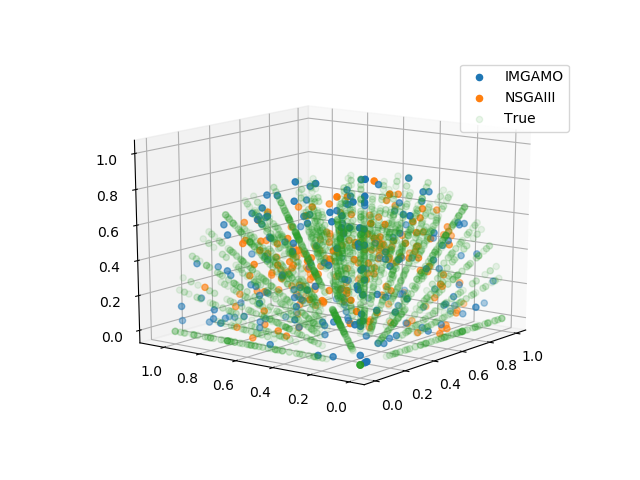

In [71]:
%matplotlib notebook
ax = plt.figure().add_subplot(111, projection='3d')
solver.result.plot_3d(ax, 0, 1, 2)
ax.scatter(res.F[:,0], res.F[:,1], res.F[:,2], marker='o', label='NSGAIII')
ax.scatter(res.pf[:,0], res.pf[:,1], res.pf[:,2], marker='o', label='True', alpha=0.1)
ax.legend()
plt.show()

In [73]:
np.mean(np.abs(np.sum(solver.result.evaluated_front**2, axis=1)-1))

0.007966410750711746

In [74]:
np.mean(np.abs(np.sum(res.F**2, axis=1)-1))

0.023582486242427605

In [75]:
np.mean(np.abs(np.sum(pf_tr**2, axis=1)-1))

1.2580159136632573e-16